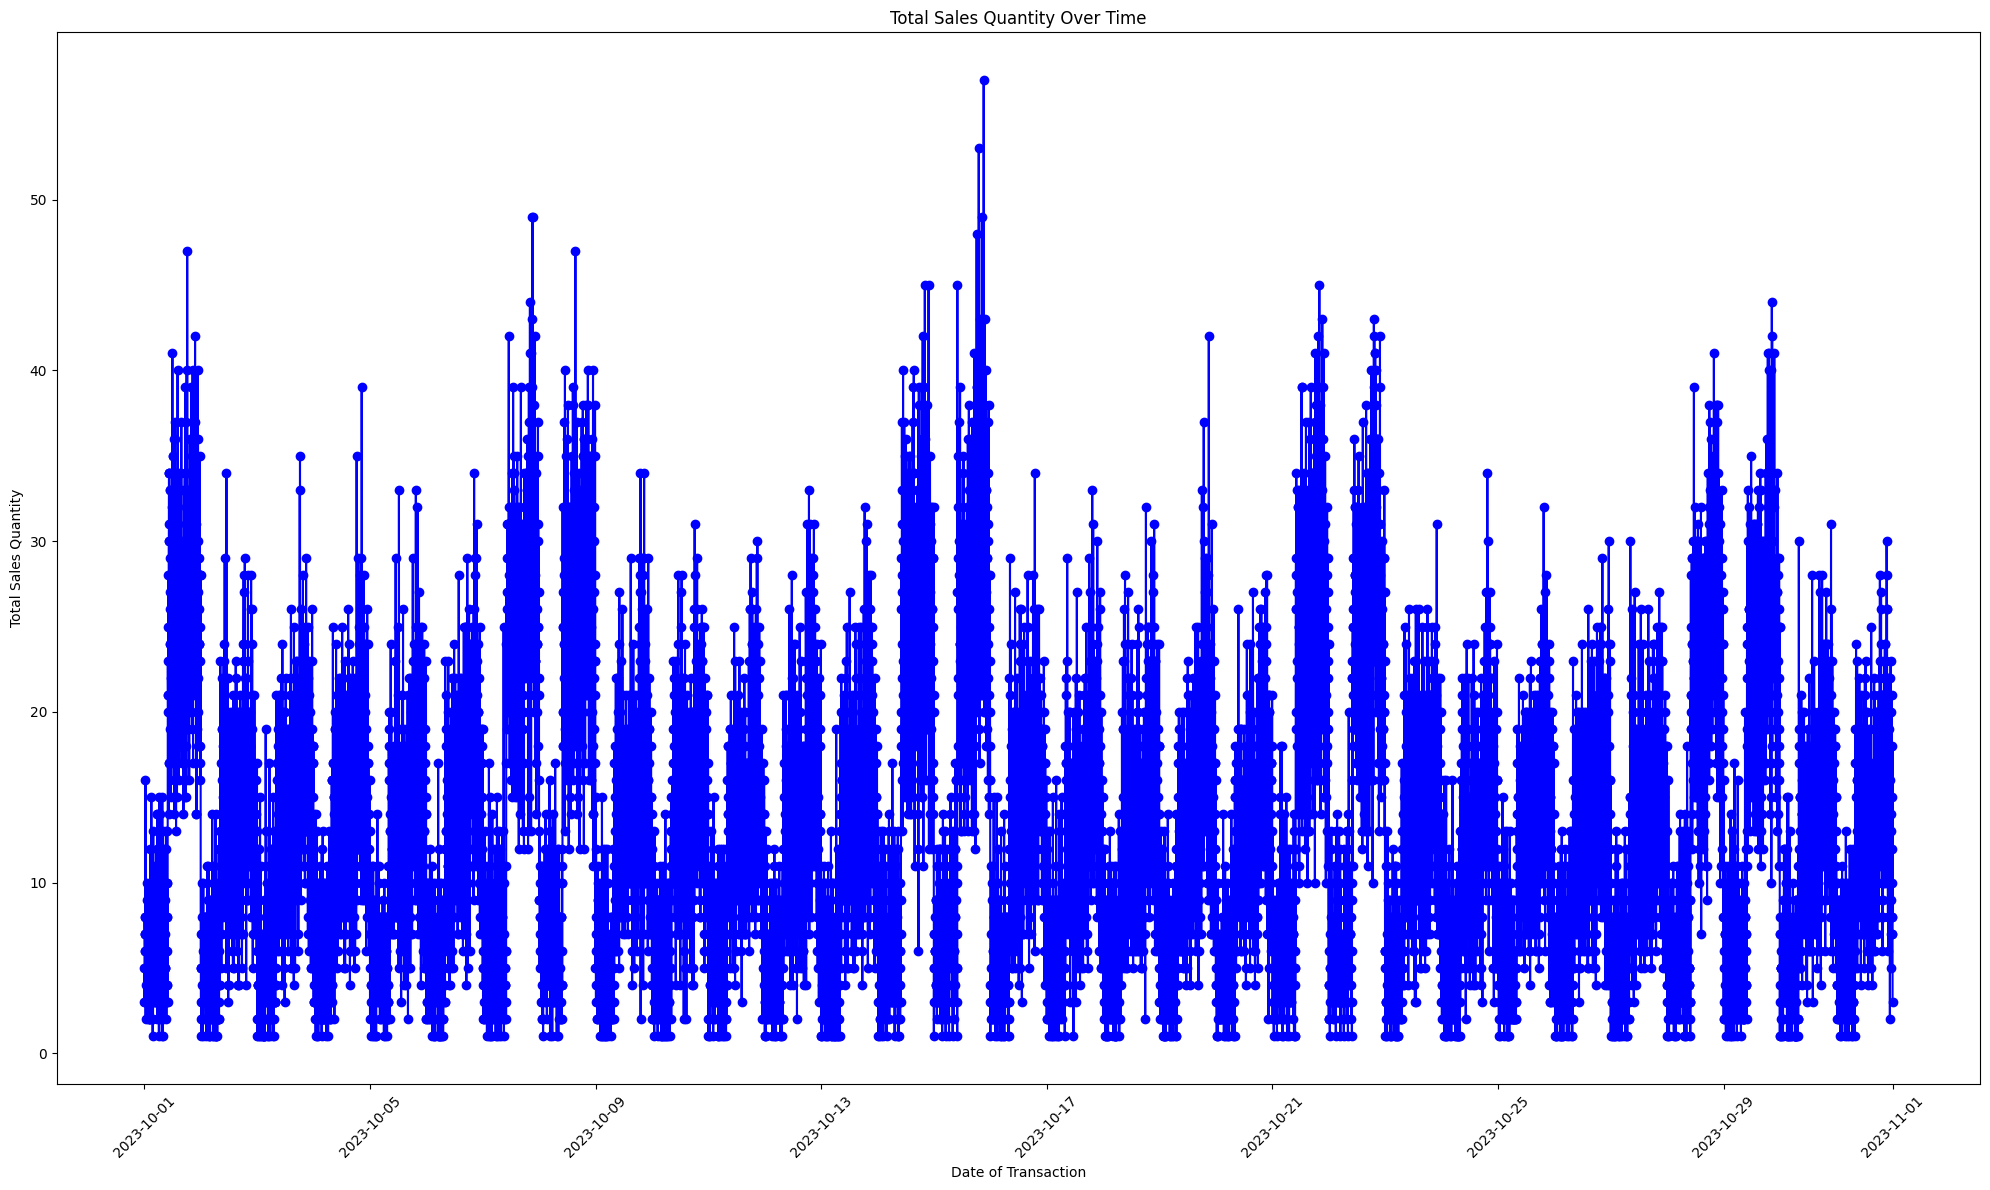

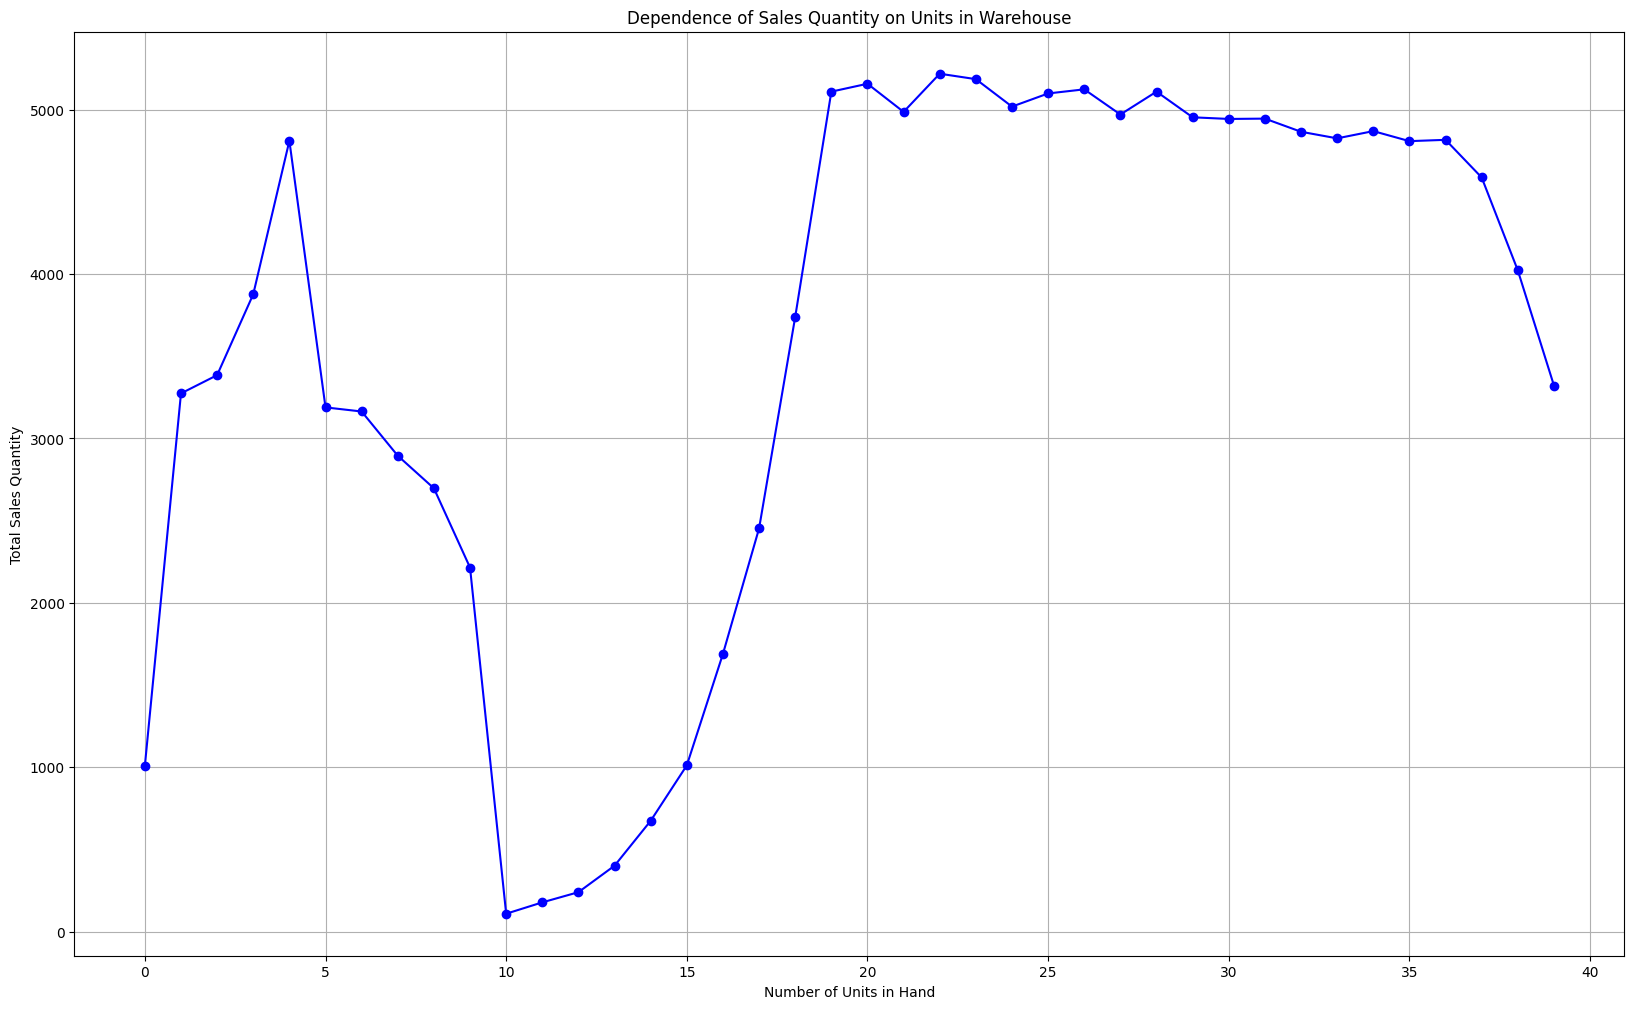

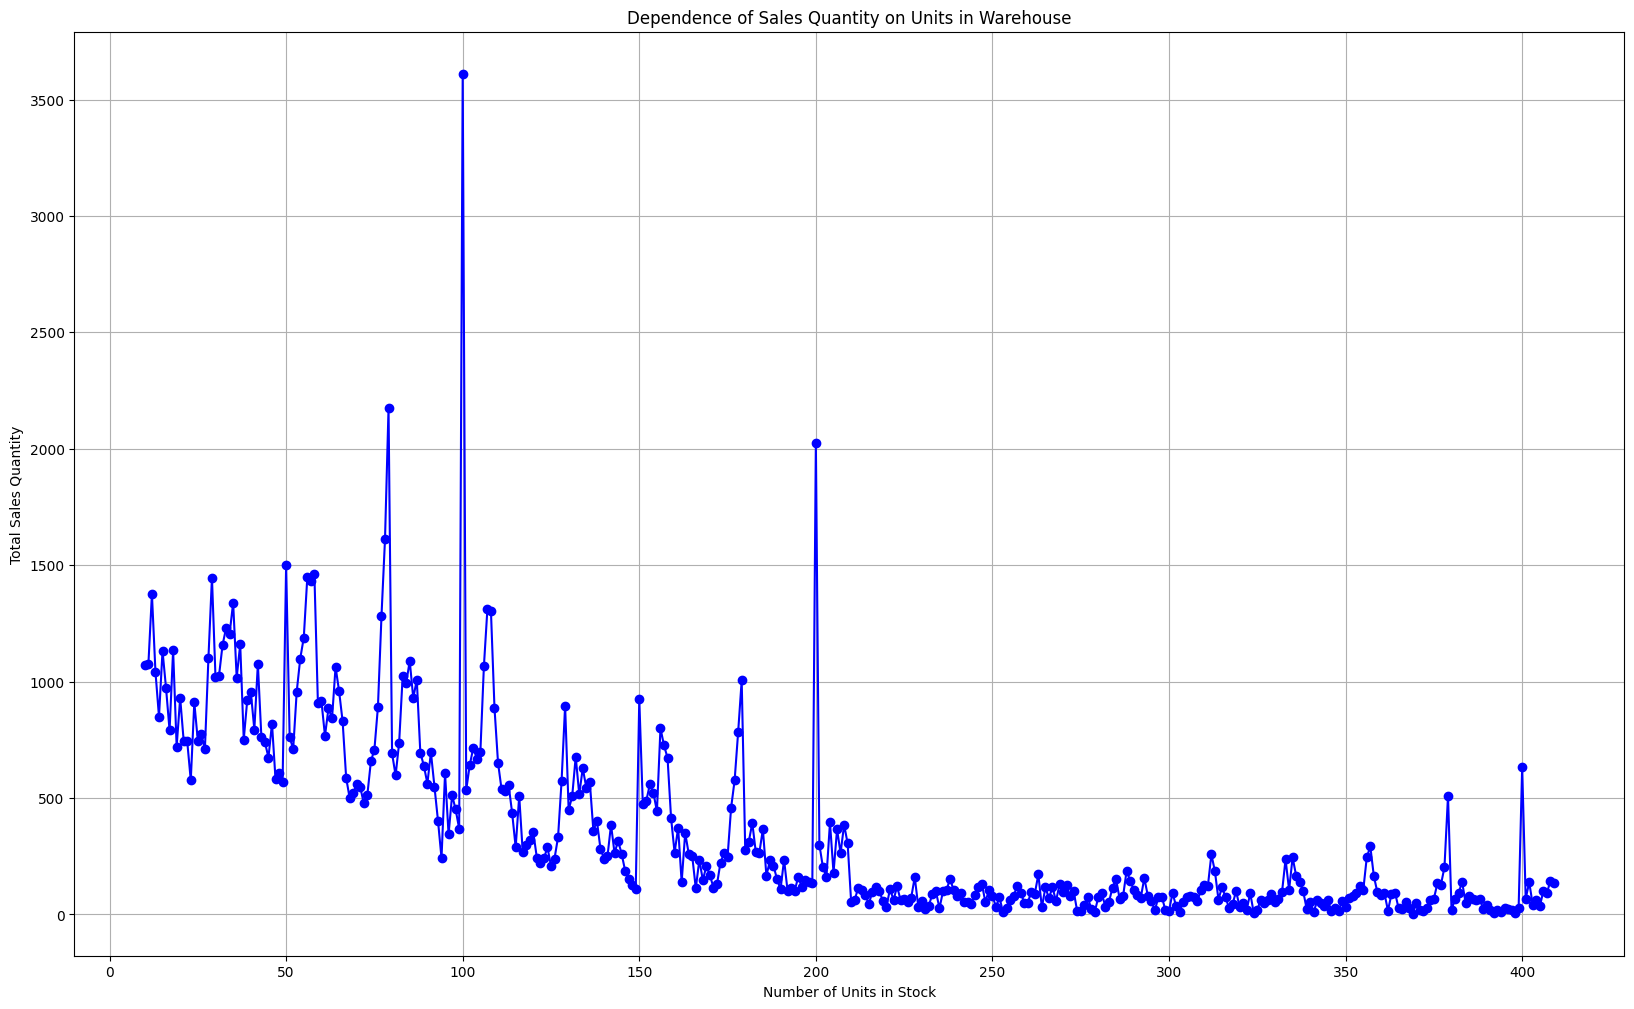

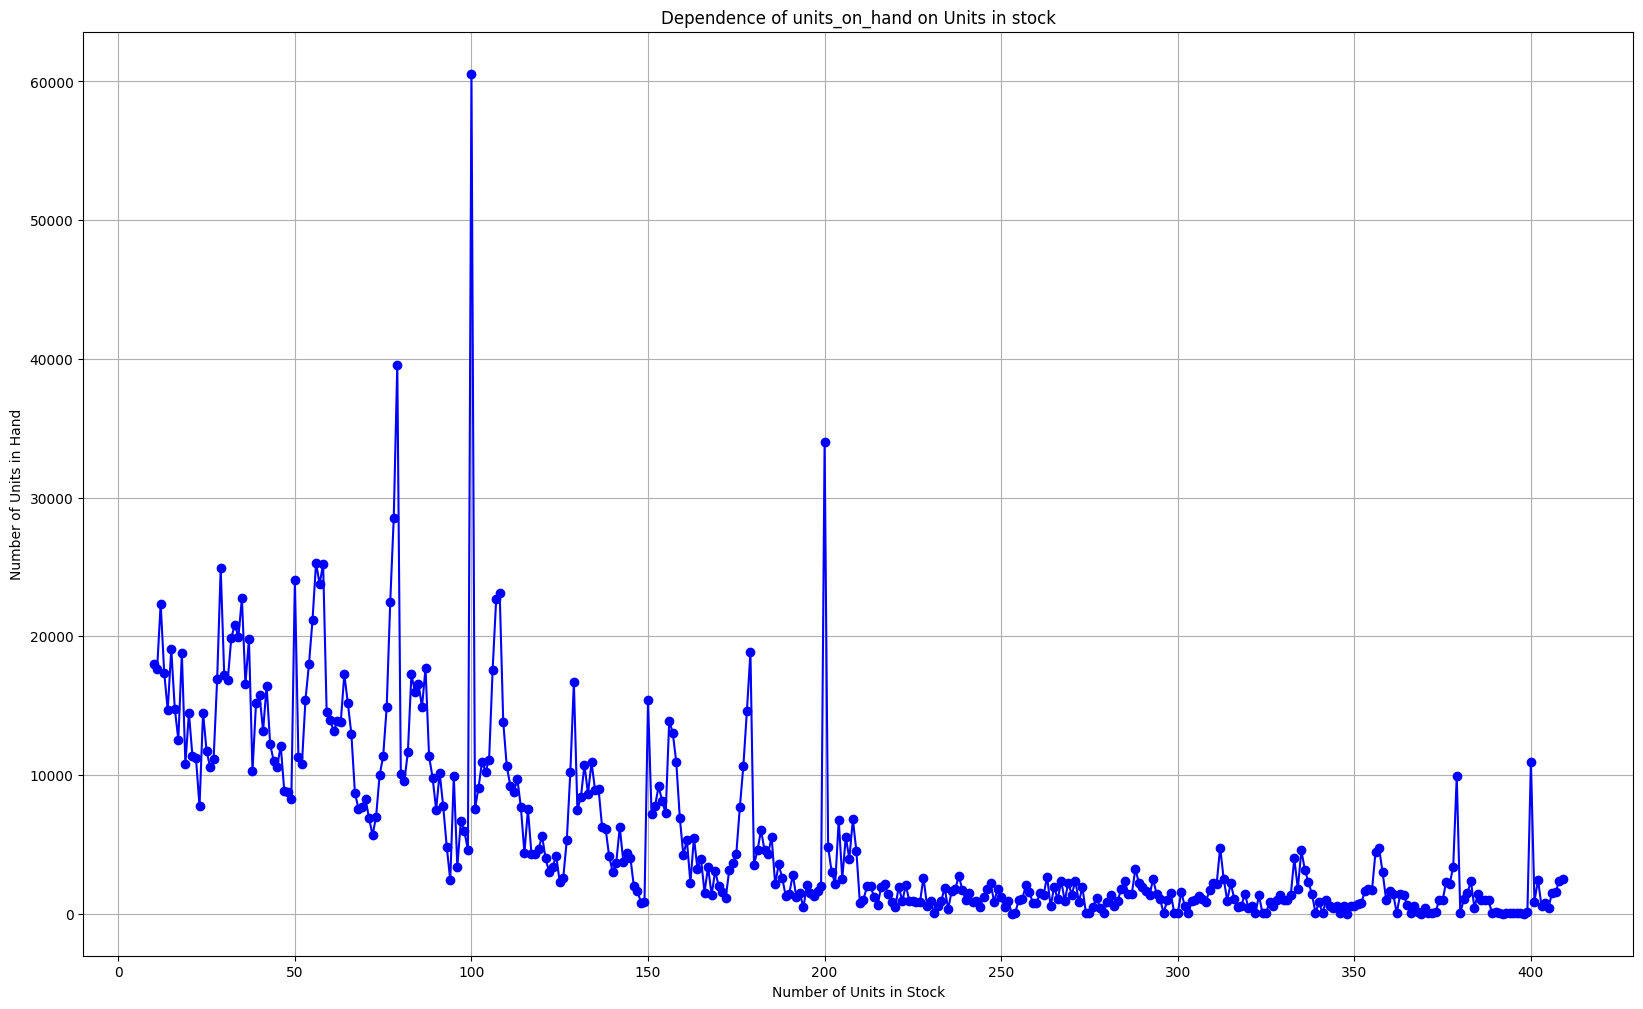

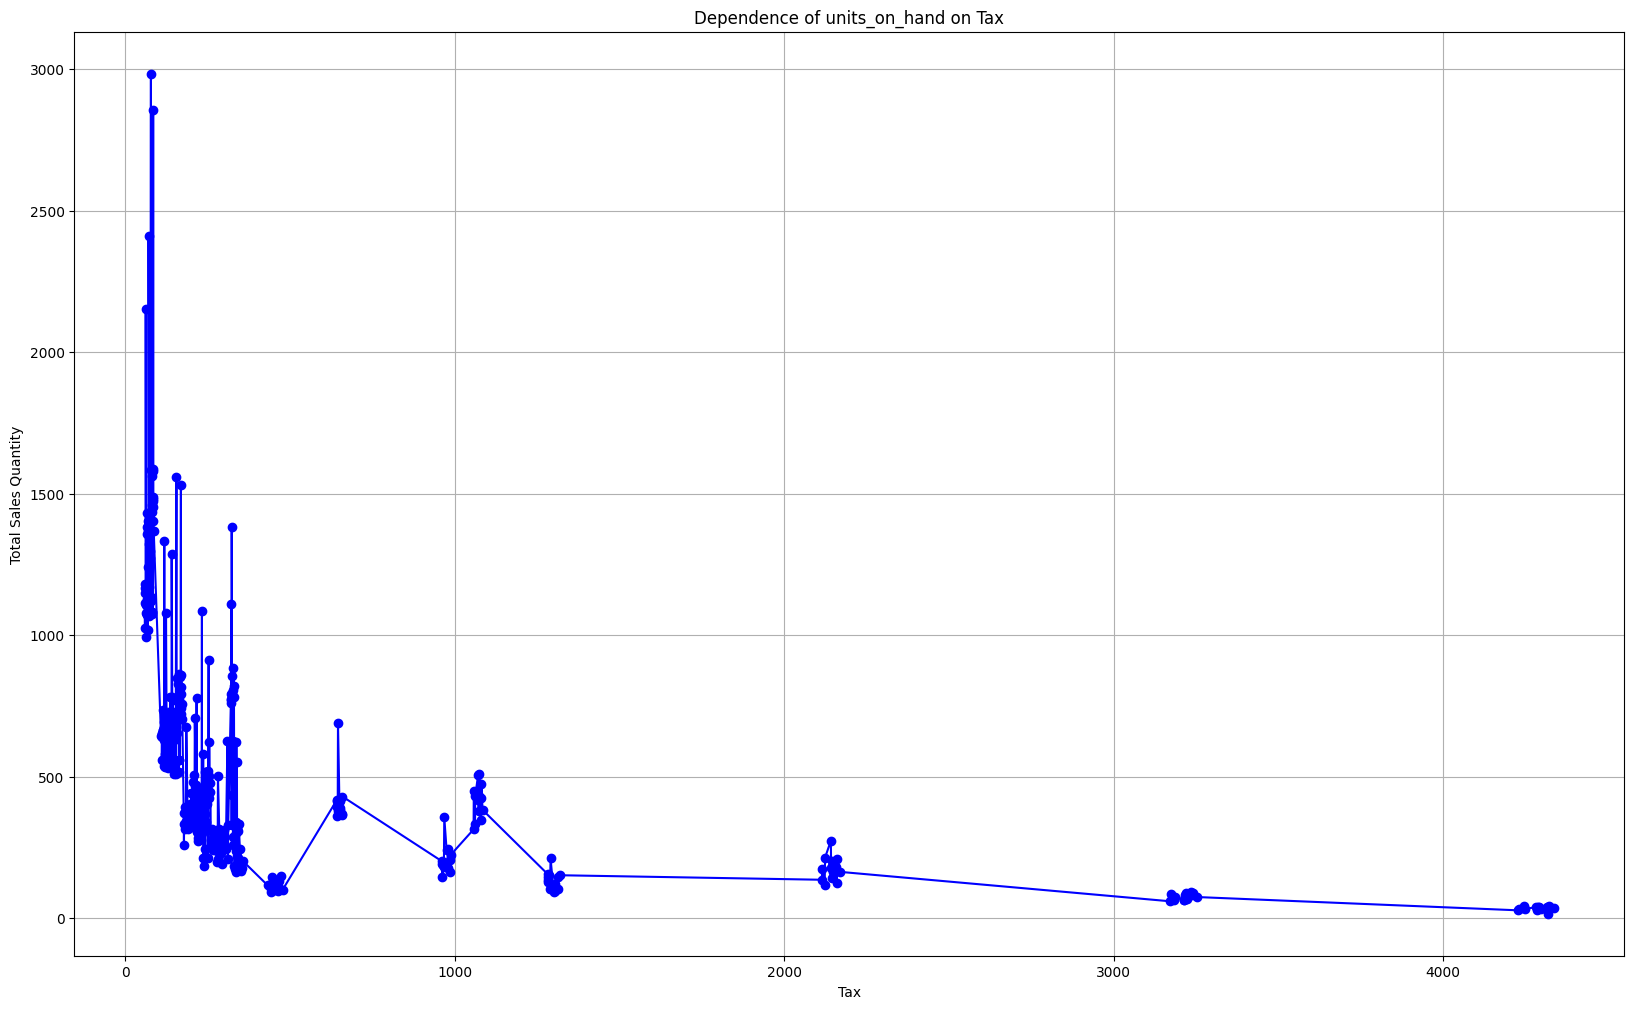

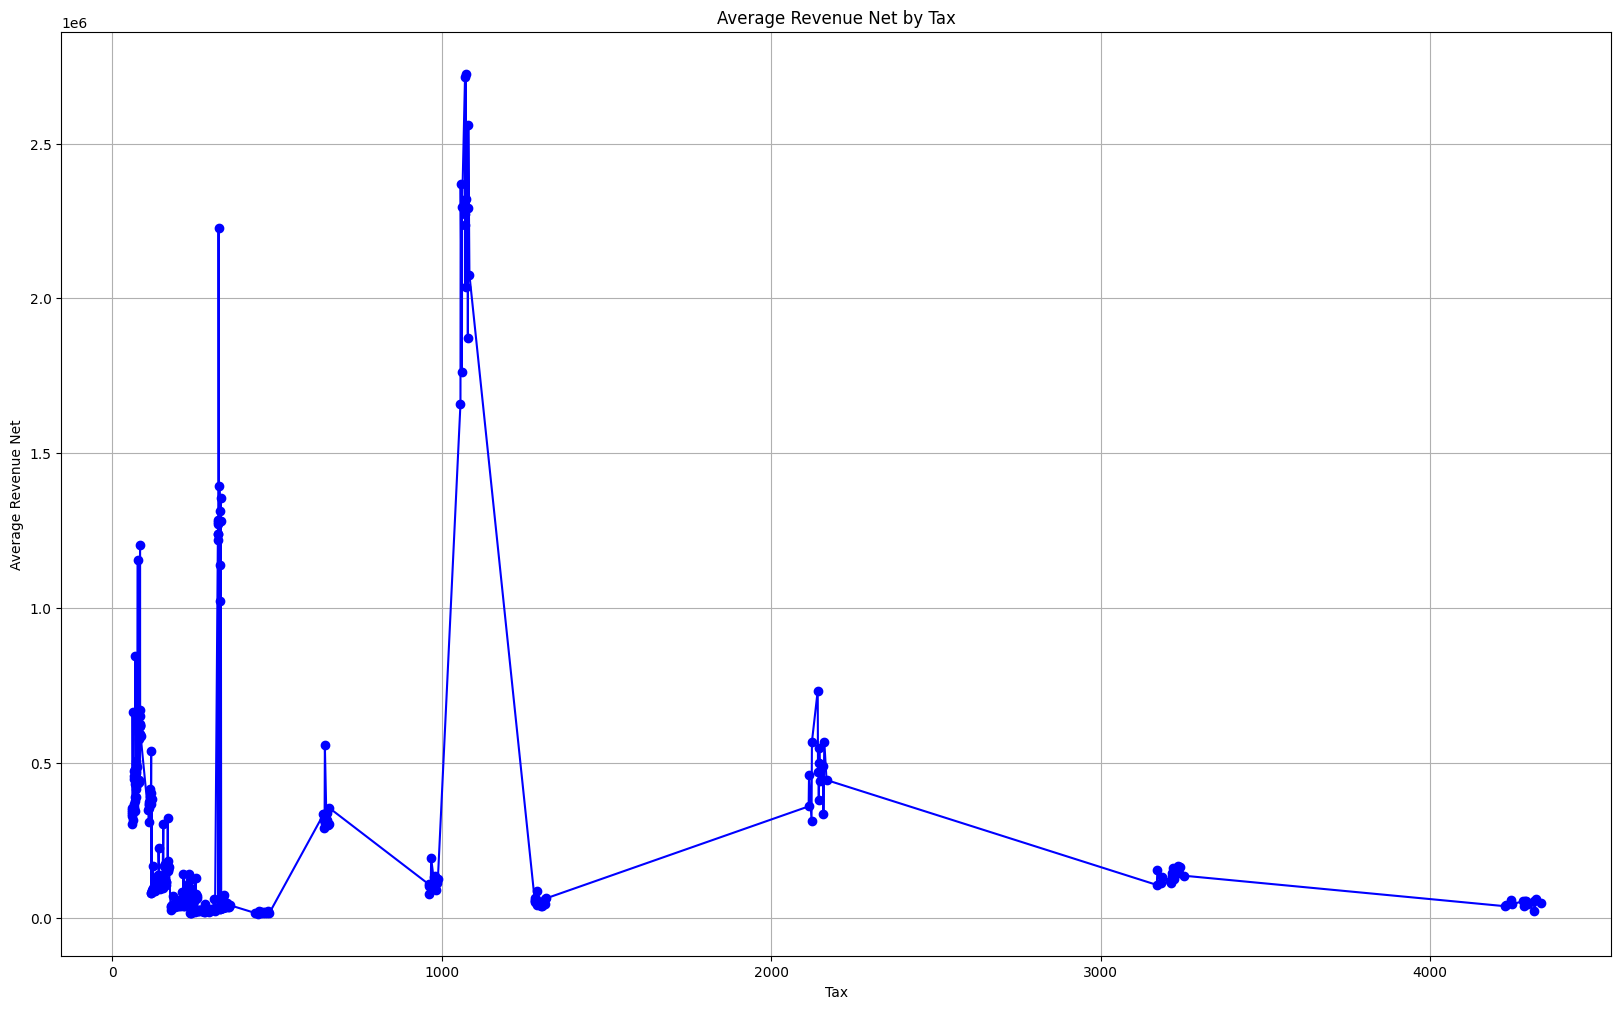

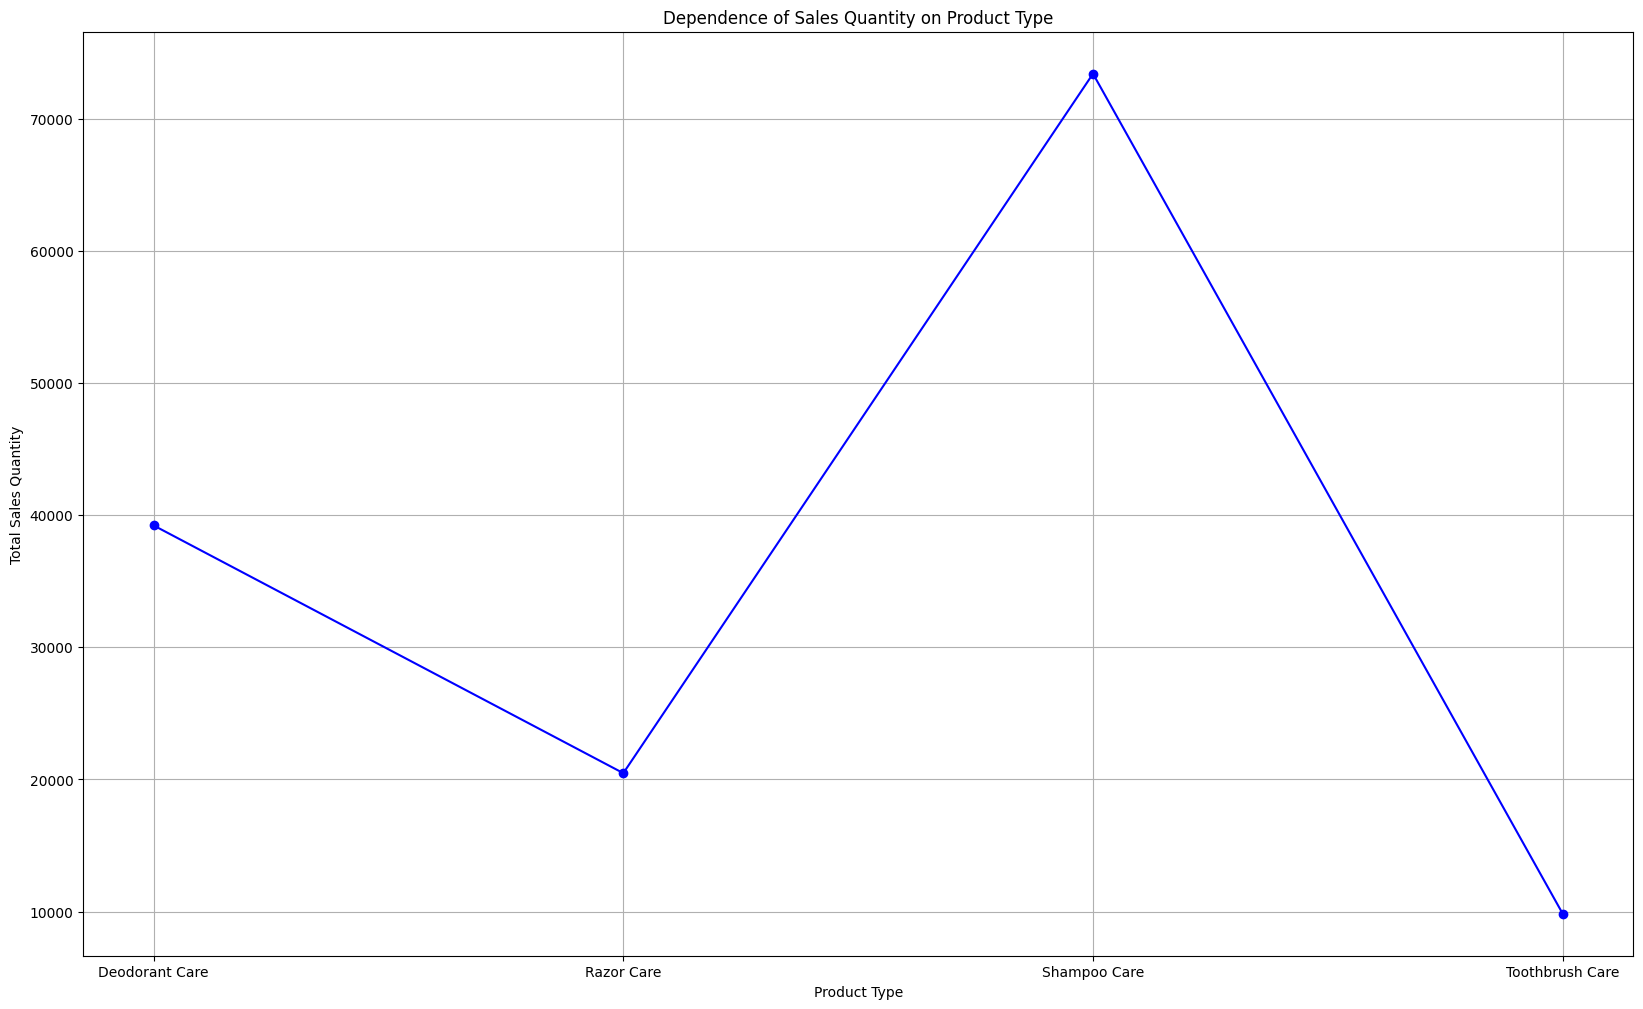

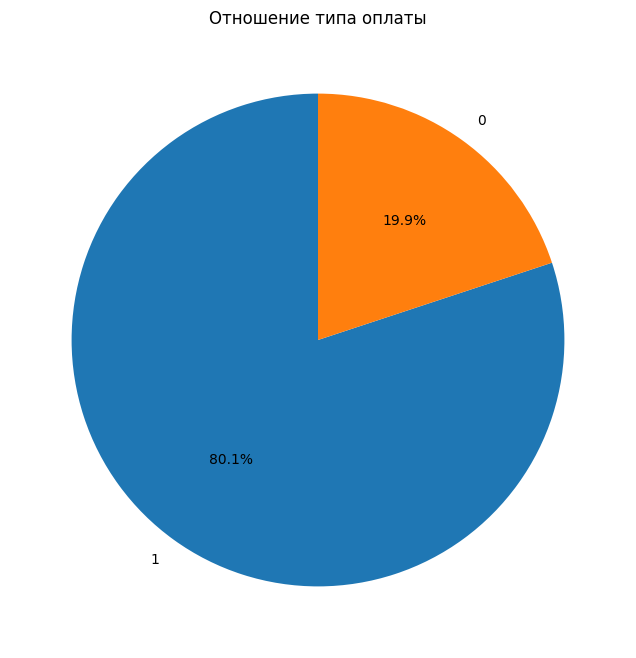

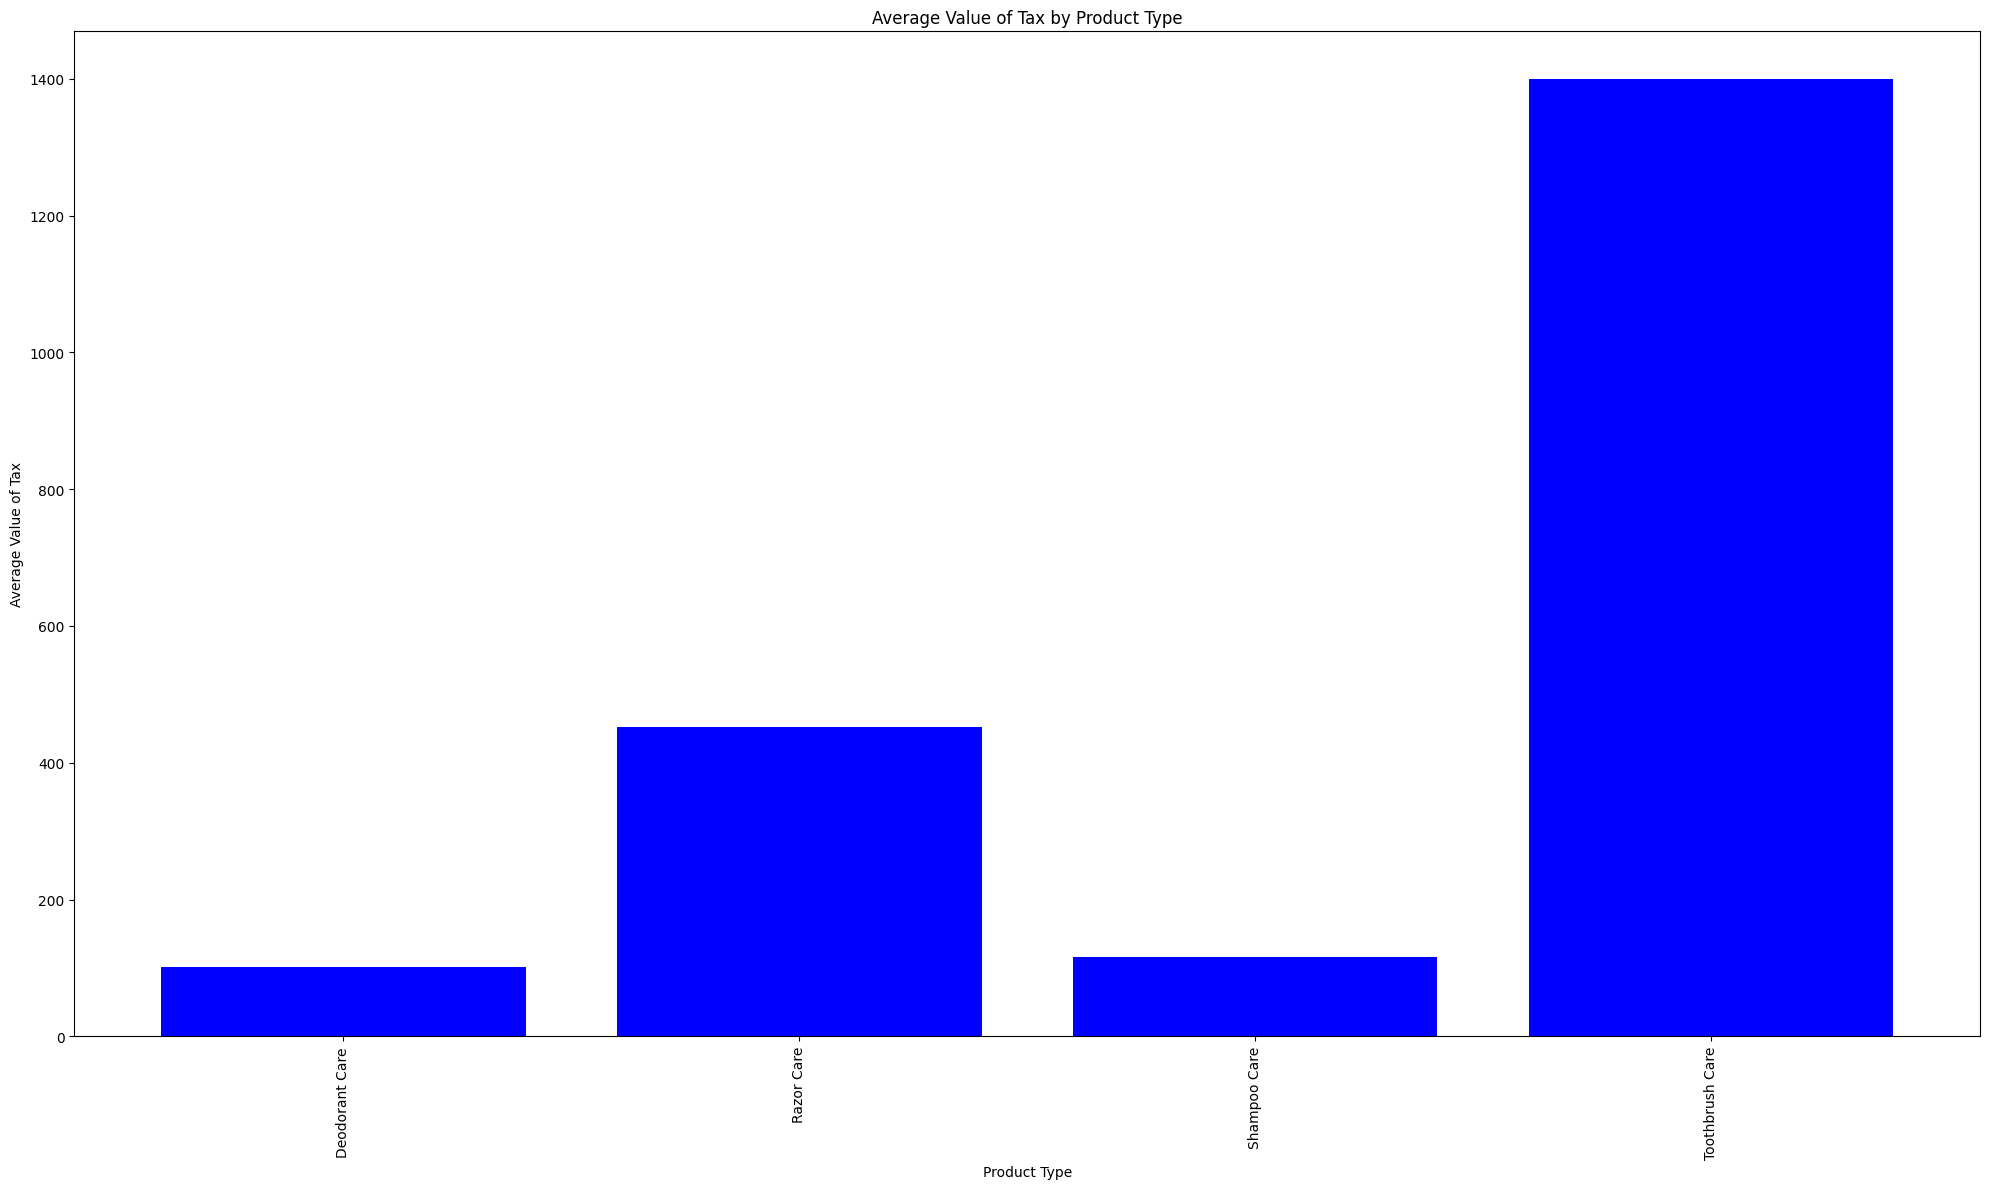

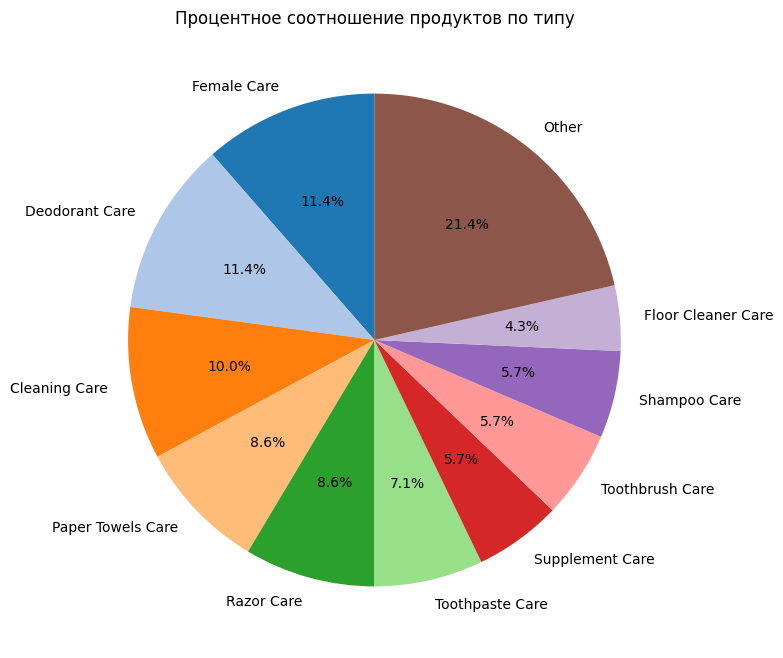

/tmp/ipykernel_6439/3943226424.py:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=pd, x='prod_type', order=order, palette='tab20')


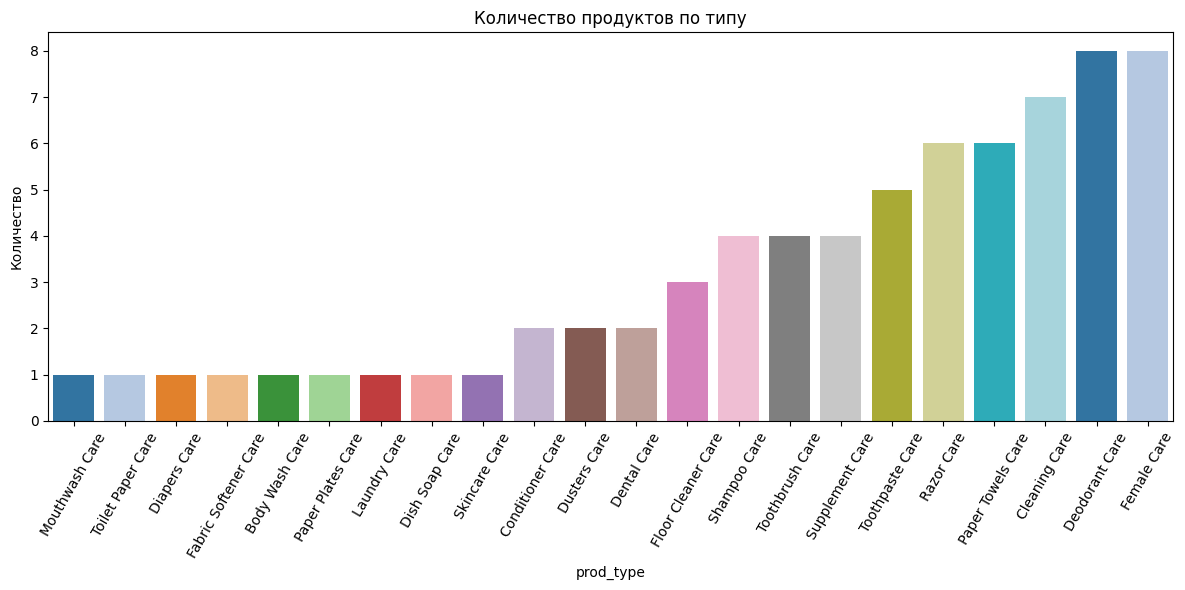

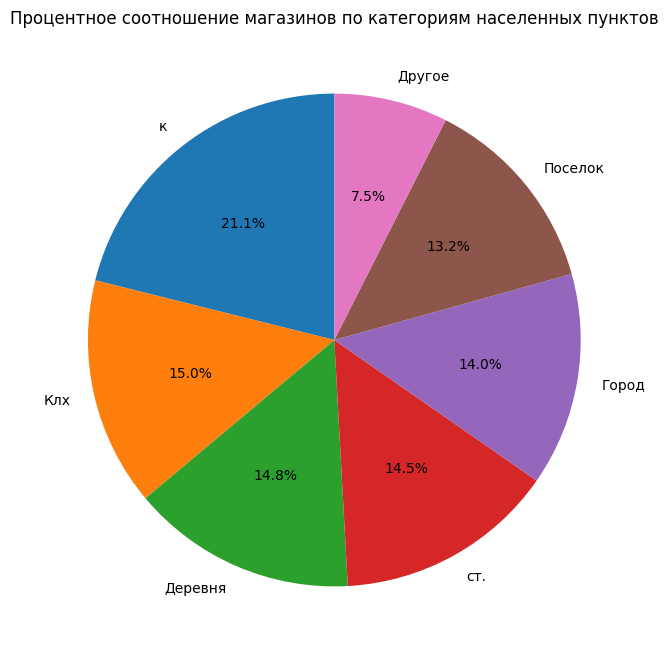

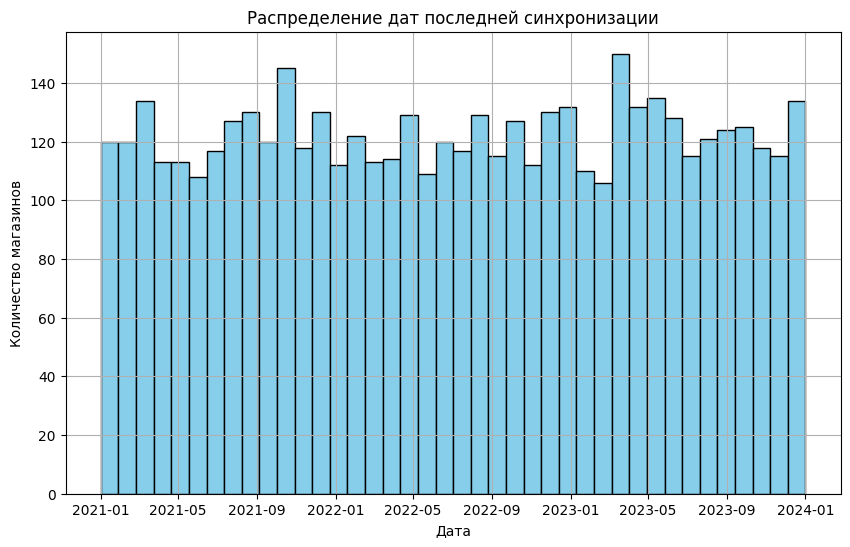

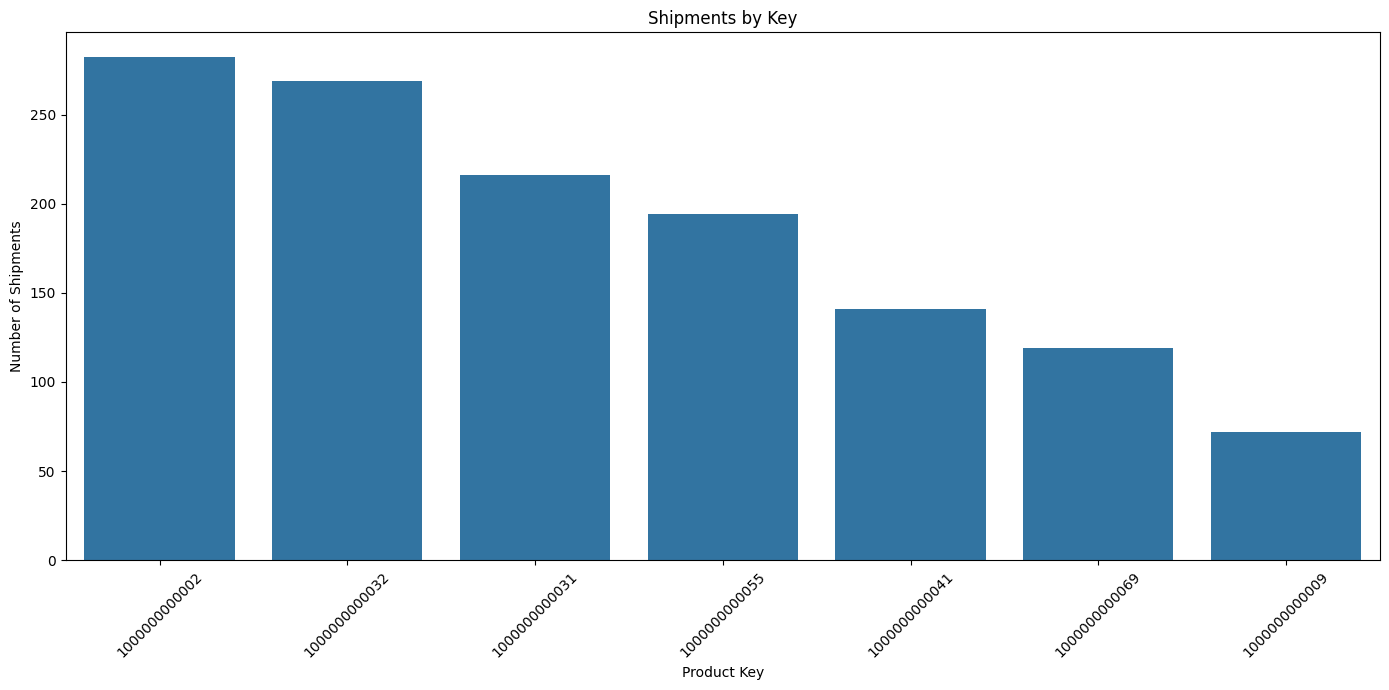

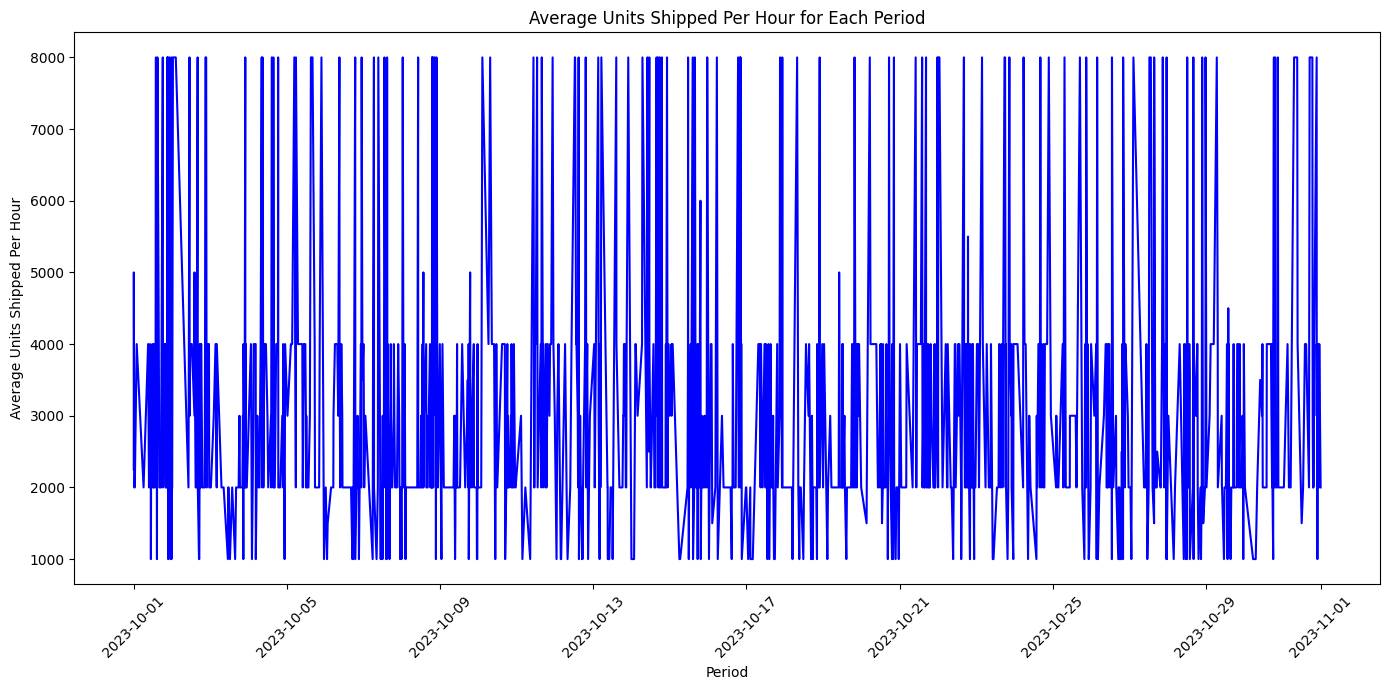

In [2]:
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
import numpy

# Part-one: Изучите, обработайте и проанализируйте представленные данные. Определите, какие по-
# лезные инсайты можно из них получить, чтобы повлиять на объем продаж товаров P&G.

store_map = {} #мапа из ключей site_banner и site_city в значения - магазины
# to-do :какие ещё зависимости можно поискать
# to-do :как отображать многомерные зависимости
# tp-do :убрать копипасту

git_location = 'https://raw.githubusercontent.com/EgorFarafonov367578/ITCUP2024/main/data_source/'

#вспомагательные методы
def plot_sales(pos_data, data_argument, data_depend, xlabel, ylabel, title):
    summary = pos_data.groupby(data_argument)[data_depend].sum().reset_index()
    plt.figure(figsize=(20, 12))
    plt.plot(summary[data_argument], summary[data_depend], marker='o', linestyle='-', color='b')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

#основные методы    
def analysis_pos_general():
    pos_data = pandas.read_csv(git_location +'pos_general.csv', delimiter=',')
    prod_data = pandas.read_csv(git_location + 'prod_dim.csv', delimiter=',')

    #зависимость объема продаж от времени
    pos_data['period_start_date'] = pandas.to_datetime(pos_data['period_start_date'])
    pos_data['period_end_date'] = pandas.to_datetime(pos_data['period_end_date'])
    
    summary_data = pos_data.groupby([pos_data['period_start_date'], pos_data['period_end_date']])['pos_sales_qty'].sum().reset_index(name='total_sales_qty')

    plt.figure(figsize=(20, 12))
    plt.plot(summary_data['period_start_date'], summary_data['total_sales_qty'], marker='o', linestyle='-', color='b')
    plt.title('Total Sales Quantity Over Time')
    plt.xlabel('Date of Transaction')
    plt.ylabel('Total Sales Quantity')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    #зависимость продаж от продуктов на полках
    plot_sales(pos_data, 'units_on_hand', 'pos_sales_qty', 'Number of Units in Hand', 'Total Sales Quantity', 'Dependence of Sales Quantity on Units in Warehouse')
   # зависимость продаж от продуктов на складе
    plot_sales(pos_data, 'units_on_stock', 'pos_sales_qty', 'Number of Units in Stock', 'Total Sales Quantity', 'Dependence of Sales Quantity on Units in Warehouse')
    # зависимость продуктов на полке от продуктов на складе
    plot_sales(pos_data, 'units_on_stock', 'units_on_hand', 'Number of Units in Stock', 'Number of Units in Hand', 'Dependence of units_on_hand on Units in stock')
    # зависимость продаж от налога
    plot_sales(pos_data, 'tax', 'pos_sales_qty', 'Tax', 'Total Sales Quantity', 'Dependence of units_on_hand on Tax')
   # зависимость средней арифметической выручки от налога
    pos_data['average_revenue'] = pos_data['pos_sales_net'] / pos_data['pos_sales_qty']
    plot_sales(pos_data, 'tax', 'average_revenue', 'Tax', 'Average Revenue Net', 'Average Revenue Net by Tax')
   # зависимость продаж от типа продаваемого продукта
    merged_data = pos_data.merge(prod_data, left_on='prod_key', right_on='EAN', how='inner')
    plot_sales(merged_data, 'prod_type', 'pos_sales_qty', 'Product Type', 'Total Sales Quantity', 'Dependence of Sales Quantity on Product Type')
   #зависимость продаж от оплаты начиной или карты
    plt.figure(figsize=(8, 8))
    prod_type_counts = pos_data['payment'].value_counts()
    prod_type_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
    plt.title('Отношение типа оплаты')
    plt.ylabel('')
    plt.show()
   #зависимость продаж оплаты наличкой или картой от типа населенного пункта
    
   #зависимость налога от типа товара 
    tax_by_prod_type = merged_data.groupby('prod_type')['tax'].mean().reset_index()
    plt.figure(figsize=(20, 12))
    plt.bar(tax_by_prod_type['prod_type'], tax_by_prod_type['tax'], color='b')
    plt.title('Average Value of Tax by Product Type')
    plt.xlabel('Product Type')
    plt.ylabel('Average Value of Tax')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
   # ещё надо добавить зависимости продаж компании P&G от всего вышеперечисленного


def analysis_prod_dim() -> None:
    """
    Выводит круговую диаграмму с процентным соотношением продуктов по типу
      и гистограмму с количеством продуктов по типу.
    """
    #Fields_of_prod_dim = ["id","SKU_name","SKU_name_local","last_sync_name","EAN","Producer","md_type","gtin","prod_type","status"]
    pd = pandas.read_csv(git_location + 'prod_dim.csv', delimiter = ',')
    pd = pd[['last_sync_name', 'prod_type', 'status']]

    #круговая диаграмма
    colors = plt.cm.tab20.colors 
    plt.figure(figsize=(8, 8))
    prod_type_counts = pd['prod_type'].value_counts()
    mask = prod_type_counts / prod_type_counts.sum() < 0.03 
    filtered_counts = prod_type_counts[~mask]
    filtered_counts['Other'] = prod_type_counts[mask].sum()
    labels = filtered_counts.index
    filtered_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, labels=labels, colors=colors)
    plt.title('Процентное соотношение продуктов по типу')
    plt.ylabel('')
    plt.show()

    # Гистограмма
    plt.figure(figsize=(12, 6))
    order = pd['prod_type'].value_counts().index[::-1]
    sns.countplot(data=pd, x='prod_type', order=order, palette='tab20')
    plt.title('Количество продуктов по типу')
    plt.ylabel('Количество')
    plt.xticks(rotation=60)  
    plt.tight_layout()  
    plt.show()

def classify_location(city_name):
    if isinstance(city_name, str):
        if 'г.' in city_name:
            return 'Город'
        elif 'п.' in city_name:
            return 'Поселок'
        elif 'д.' in city_name:
            return 'Деревня'
        elif 'клх'in city_name:
            return 'Клх'
        elif 'ст.'in city_name:
            return 'ст.'
        elif 'к'in city_name:
            return 'к'
    return 'Другое'


def analysis_site_dim() -> None:
    """
    Выводит круговую диаграмму с процентным соотношением количества магазинов по типу
    населеннного пункта и гистограмму с датой последней синхронизацией.
    """
    sd = pandas.read_csv(git_location + 'site_dim.csv', delimiter = ',')
    sd = sd[['id', 'site_type_key', 'cust_id', 'last_sync_date', 'site_type_key', 'site_name', 'site_banner', 'site_city']]

    # 1) Создание карты с магазинами по ключу site_banner и site_city
    for _, row in sd.iterrows():
        key = (row['site_banner'], row['site_city'])
        if key not in store_map:
            store_map[key] = []
        store_map[key].append({'id': row['id'], 'site_type_key': row['site_type_key'], 'cust_id': row['cust_id']})

    # 2) Построение круговой диаграммы для типов site_banner
    sd['location_type'] = sd['site_city'].apply(classify_location)
    location_counts = sd['location_type'].value_counts()
    plt.figure(figsize=(8, 8))
    location_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, labels=location_counts.index)
    plt.title('Процентное соотношение магазинов по категориям населенных пунктов')
    plt.ylabel('')
    plt.show()

    # 3) Анализ последней синхронизации (last_sync_date)
    plt.figure(figsize=(10, 6))
    sd['last_sync_date'] = pandas.to_datetime(sd['last_sync_date'])
    sd['last_sync_date'].hist(bins=40, color='skyblue', edgecolor='black')
    plt.title('Распределение дат последней синхронизации')
    plt.xlabel('Дата')
    plt.ylabel('Количество магазинов')
    plt.show()

def analysis_shipments() -> None:
    shipments_data = pandas.read_csv(git_location + 'shipments.csv', delimiter=',')
    shipments_per_product = shipments_data['prod_key'].value_counts()
    plt.figure(figsize=(14, 7))
    sns.barplot(x=shipments_per_product.index.astype(str), y=shipments_per_product.values)
    plt.title('Shipments by Key')
    plt.xlabel('Product Key')
    plt.ylabel('Number of Shipments')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    shipments_data['from_dt'] = pandas.to_datetime(shipments_data['from_dt'])
    shipments_data['to_dt'] = pandas.to_datetime(shipments_data['to_dt'])
    shipments_data['duration_hours'] = (shipments_data['to_dt'] - shipments_data['from_dt']).dt.total_seconds() / 3600
    shipments_data['avg_units_per_hour'] = shipments_data['shipped_units'] / shipments_data['duration_hours']
    avg_units_per_hour_period = shipments_data.groupby('from_dt')['avg_units_per_hour'].mean().reset_index()
    plt.figure(figsize=(14, 7))
    plt.plot(avg_units_per_hour_period['from_dt'], avg_units_per_hour_period['avg_units_per_hour'], color='blue')
    plt.title('Average Units Shipped Per Hour for Each Period')
    plt.xlabel('Period')
    plt.ylabel('Average Units Shipped Per Hour')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



if __name__ == '__main__':
    analysis_pos_general()
    analysis_prod_dim()
    analysis_site_dim()
    analysis_shipments()

# Part-two: (попробовать создать простую рек. систему)
# 1) Какие метрики использовать?
# 2) Какие модели системы можно реализовать?
    
# Part-three: Как это представить в SQL-type формате?